In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import glob

In [21]:
def get_ps_tsm_dataframes_csv(file_pattern: str) -> tuple[list[pd.DataFrame], list[pd.DataFrame]]:
    """
    Get the dataframes for the PS and TSM data from the files that match the pattern.
    """
    df = pd.DataFrame({}) 
    for file in glob.iglob(file_pattern):
        df_tmp = pd.read_csv(file)
        df = pd.concat([df, df_tmp], ignore_index=True)

    df_ps = df[df['type'] == 'ps'].reset_index(drop=True)
    df_tsm = df[df['type'] == 'tsm'].reset_index(drop=True)
    
    return  df_ps, df_tsm

### STOI

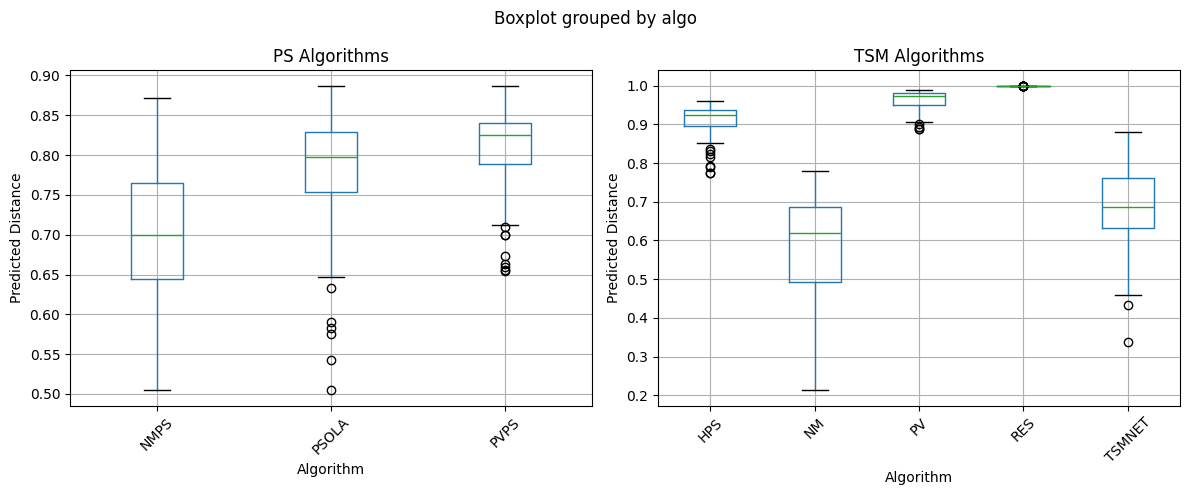

In [24]:
df_stoi_ps, df_stoi_tsm = get_ps_tsm_dataframes_csv("evaluation/objective/stoi/*.csv")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot for df_ps
df_stoi_ps.boxplot(by='algo', column='pred_distance', rot=45, ax=axes[0])
axes[0].set_title('PS Algorithms')
axes[0].set_xlabel('Algorithm')
axes[0].set_ylabel('Predicted Distance')

# Boxplot for df_tsm
df_stoi_tsm.boxplot(by='algo', column='pred_distance', rot=45, ax=axes[1])
axes[1].set_title('TSM Algorithms')
axes[1].set_xlabel('Algorithm')
axes[1].set_ylabel('Predicted Distance')

plt.tight_layout()
plt.show()

### SISNR

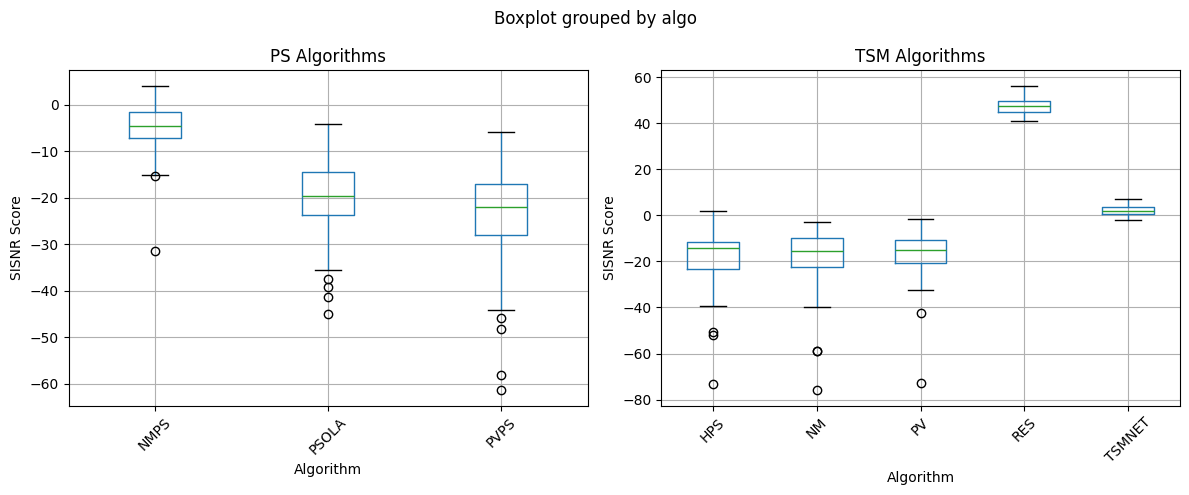

In [25]:
df_sisnr_ps, df_sisnr_tsm = get_ps_tsm_dataframes_csv("evaluation/objective/sisnr/*.csv")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot for df_ps
df_sisnr_ps.boxplot(by='algo', column='sisnr_score', rot=45, ax=axes[0])
axes[0].set_title('PS Algorithms')
axes[0].set_xlabel('Algorithm')
axes[0].set_ylabel('SISNR Score')

# Boxplot for df_tsm
df_sisnr_tsm.boxplot(by='algo', column='sisnr_score', rot=45, ax=axes[1])
axes[1].set_title('TSM Algorithms')
axes[1].set_xlabel('Algorithm')
axes[1].set_ylabel('SISNR Score')

plt.tight_layout()
plt.show()

### PESQ

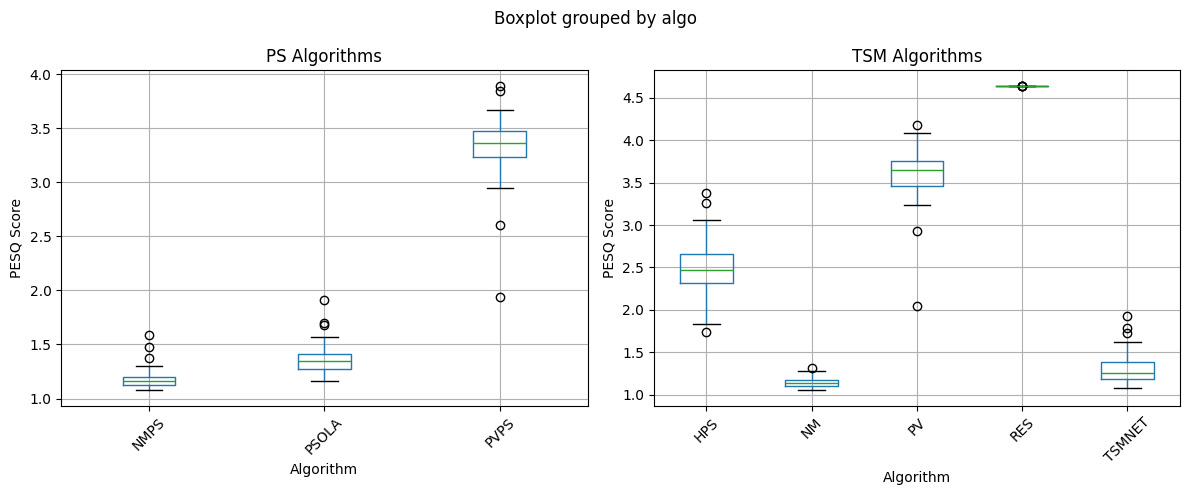

In [26]:
df_pesq_ps, df_pesq_tsm = get_ps_tsm_dataframes_csv("evaluation/objective/pesq/*.csv")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot for df_ps
df_pesq_ps.boxplot(by='algo', column='pesq_score', rot=45, ax=axes[0])
axes[0].set_title('PS Algorithms')
axes[0].set_xlabel('Algorithm')
axes[0].set_ylabel('PESQ Score')

# Boxplot for df_tsm
df_pesq_tsm.boxplot(by='algo', column='pesq_score', rot=45, ax=axes[1])
axes[1].set_title('TSM Algorithms')
axes[1].set_xlabel('Algorithm')
axes[1].set_ylabel('PESQ Score')

plt.tight_layout()
plt.show()

### NISQA

In [ ]:
df_pesq_ps, df_pesq_tsm = get_ps_tsm_dataframes_csv("evaluation/objective/niqsa/tts/*.csv")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot for df_ps
df_pesq_ps.boxplot(by='algo', column='pesq_score', rot=45, ax=axes[0])
axes[0].set_title('PS Algorithms')
axes[0].set_xlabel('Algorithm')
axes[0].set_ylabel('PESQ Score')

# Boxplot for df_tsm
df_pesq_tsm.boxplot(by='algo', column='pesq_score', rot=45, ax=axes[1])
axes[1].set_title('TSM Algorithms')
axes[1].set_xlabel('Algorithm')
axes[1].set_ylabel('PESQ Score')

plt.tight_layout()
plt.show()

In [ ]:
df_nisqa_tts = pd.DataFrame({}) 
for file in glob.iglob("evaluation/objective/niqsa/tts/*.csv"):
    df_tmp = pd.read_csv(file)
    df_nisqa_tts = pd.concat([df_nisqa_tts, df_tmp], ignore_index=True)

df_nisqa_tts_ps = df_nisqa_tts[df_nisqa_tts['type'] == 'ps'].reset_index(drop=True)
df_nisqa_tts_tsm = df_nisqa_tts[df_nisqa_tts['type'] == 'tsm'].reset_index(drop=True)

In [11]:
df = pd.DataFrame({}) 

for file in glob.iglob("evaluation/objective/nisqa/NISQA_results_*.csv"):
    # create a pandas dataframe from the csvs, append them together
    df2 = pd.read_csv(file)
    df = pd.concat([df, df2], ignore_index=True)

df_ps = df[df['type'] == 'ps']
df_tsm = df[df['type'] == 'tsm']

df_ps


KeyError: 'type'

In [ ]:
df_tsm

,Unnamed: 0,path,mos_pred,noi_pred,dis_pred,col_pred,loud_pred,model,type,algo,factor
976,0,data/output/wav48/tsm/HPS/0.5/p225/p225_159.wav,3.123737,3.926475,3.074592,3.958892,4.198115,NISQAv2,tsm,HPS,0.5
977,1,data/output/wav48/tsm/HPS/0.5/p225/p225_165.wav,4.233909,4.006651,4.259006,4.206461,4.204038,NISQAv2,tsm,HPS,0.5
978,2,data/output/wav48/tsm/HPS/0.5/p225/p225_171.wav,1.769837,3.798895,2.482850,3.410592,3.389509,NISQAv2,tsm,HPS,0.5
979,3,data/output/wav48/tsm/HPS/0.5/p225/p225_039.wav,4.175957,4.020401,3.917203,3.983211,4.004545,NISQAv2,tsm,HPS,0.5
980,4,data/output/wav48/tsm/HPS/0.5/p225/p225_011.wav,2.192726,3.117770,2.093236,3.136154,3.202852,NISQAv2,tsm,HPS,0.5
...,...,...,...,...,...,...,...,...,...,...,...
3899,971,data/output/wav48/tsm/NM/0.5/p226/p226_083.wav,2.731006,3.137306,3.114596,3.053269,3.494538,NISQAv2,tsm,NM,0.5
3900,972,data/output/wav48/tsm/NM/0.5/p226/p226_256.wav,4.063085,4.230211,4.082244,3.737469,4.172905,NISQAv2,tsm,NM,0.5
3901,973,data/output/wav48/tsm/NM/0.5/p226/p226_242.wav,1.792635,3.968072,2.060911,2.487411,3.324858,NISQAv2,tsm,NM,0.5
3902,974,data/output/wav48/tsm/NM/0.5/p226/p226_295.wav,3.616798,4.264616,4.319414,4.256640,4.370171,NISQAv2,tsm,NM,0.5


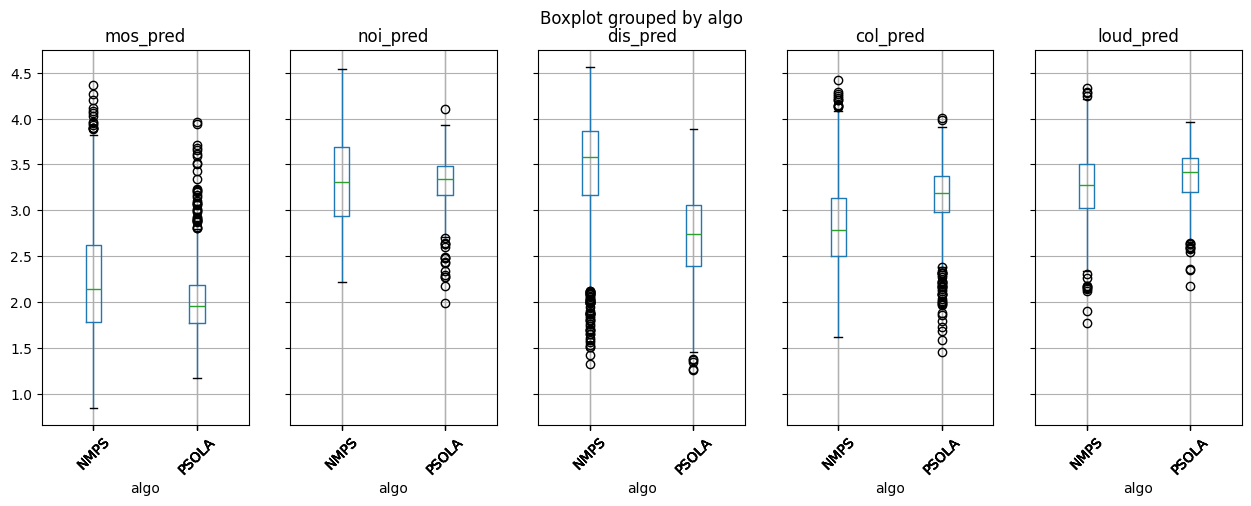

In [ ]:
boxplot = df_ps.boxplot(by='algo', column=['mos_pred', 'noi_pred', 'dis_pred', 'col_pred', 'loud_pred'], 
                        rot=45, layout=(1, 5),figsize=(15,5)) # The larger the value, the better the separation.

plt.show()

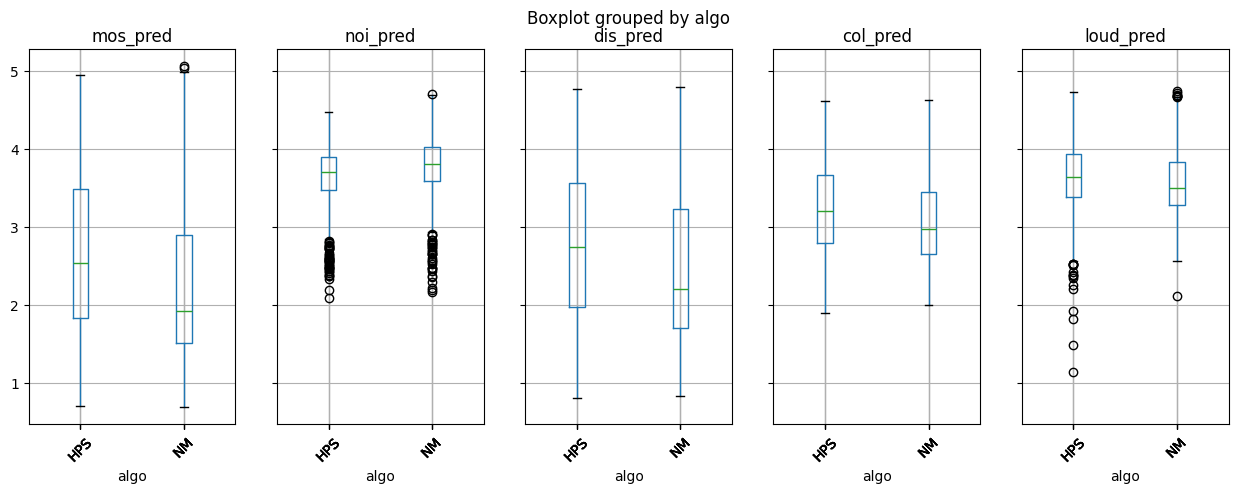

In [ ]:
boxplot = df_tsm.boxplot(by='algo', column=['mos_pred', 'noi_pred', 'dis_pred', 'col_pred', 'loud_pred'], 
                        rot=45, layout=(1, 5),figsize=(15,5)) # The larger the value, the better the separation.

plt.show()

### Audio Aesthetics

In [ ]:
df

,path,CE,CU,PC,PQ
0,data/output/wav48/tsm/HPS/rt_up/p225/p225_039.wav,5.312580,5.818285,1.680941,6.047646
1,data/output/wav48/tsm/HPS/rt_up/p225/p225_011.wav,5.119991,5.527233,1.554313,6.014470
2,data/output/wav48/tsm/HPS/rt_up/p225/p225_005.wav,5.151378,5.143028,1.764274,5.790165
3,data/output/wav48/tsm/HPS/rt_up/p225/p225_004.wav,5.343399,6.209879,1.561505,6.646964
4,data/output/wav48/tsm/HPS/rt_up/p225/p225_010.wav,5.198469,6.151221,1.521676,6.744449
...,...,...,...,...,...
64,data/output/wav48/tsm/HPS/rt_up/p225/p225_035.wav,4.723836,5.279646,1.616679,6.234015
65,data/output/wav48/tsm/HPS/rt_up/p225/p225_021.wav,4.807210,5.637803,1.602772,6.011419
66,data/output/wav48/tsm/HPS/rt_up/p225/p225_009.wav,5.073571,5.261235,1.486992,5.939985
67,data/output/wav48/tsm/HPS/rt_up/p225/p225_008.wav,5.408597,5.757857,1.494989,6.405129
